In [7]:
from two_step import two_step_overland
from ana_new import trans_ana
from math import sqrt
from farPoint import bcdPoints
import numpy as np
import matplotlib.pyplot as plt


i1 = 30.0
i2 = 60.0
i3 = 15.0
L = 100.0
n = 0.1
slope = 0.01
alpha = 1./n*sqrt(slope)
m = 5./3

ie2 = i2/3600./1000.
q2 = ie2*L
S2 = m/(m+1)*alpha/ie2*(ie2*L/alpha)**((m+1)/m)
steady_time = (ie2*L/alpha)**(1/m)/ie2

# Time of change(d)
d = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

SDCBox = list()

aa = trans_ana(i1, i2, 100.0, 201, 0.5, 0.1, 0.01)
aa.run()

aaOut = np.array(zip(aa.out_q[:, 1], aa.out_s[:, 1]))

ba = trans_ana(i2, i3, 100.0, 201, 0.5, 0.1, 0.01)
ba.run()

baOut = np.array(zip(ba.out_q[:, 1], ba.out_s[:, 1]))

aaOut[:, 0] = (aaOut[:, 0] - aaOut[0, 0])/(aaOut[-1, 0] - aaOut[0, 0])
aaOut[:, 1] = (aaOut[:, 1] - aaOut[0, 1])/(aaOut[-1, 1] - aaOut[0, 1])

baOut[:, 0] = (baOut[:, 0] - baOut[-1, 0])/(baOut[0, 0] - baOut[-1, 0])
baOut[:, 1] = (baOut[:, 1] - baOut[-1, 1])/(baOut[0, 1] - baOut[-1, 1])

plt.plot(aaOut[:, 0], aaOut[:, 1], 'k--', lw=2.0)
plt.plot(baOut[:, 0], baOut[:, 1], 'k--', lw=2.0)

for i in range(0, len(d)):
    ToC = d[i]*steady_time
    ca = two_step_overland(i1, i2, i3, 100.0, 201, 0.5, 0.1, 0.01)
    ca.ie1_duration(ToC)
    ca.transition()
    
    SDC = zip(ca.q_curve[:, 0], ca.q_curve[:, 1], ca.s_curve[:, 1])
    SDC = np.array(SDC)
    
    re_qB = (SDC[0, 1] - aa.out_q[0, 1])/(aa.out_q[-1, 1] - aa.out_q[0, 1])
    re_sB = (SDC[0, 2] - aa.out_s[0, 1])/(aa.out_s[-1, 1] - aa.out_s[0, 1])
    re_qD = (SDC[-1, 1] - ba.out_q[-1, 1])/(ba.out_q[0, 1] - ba.out_q[-1, 1])
    re_sD = (SDC[-1, 2] - ba.out_s[-1, 1])/(ba.out_s[0, 1] - ba.out_s[-1, 1])
    
    # Normalize to 0~1
    if SDC[0, 1] > SDC[-1, 1]:
        SDC[:, 1] = (SDC[:, 1] - SDC[0, 1])/(SDC[-1, 1] - SDC[0, 1])
        SDC[:, 2] = (SDC[:, 2] - SDC[0, 2])/(SDC[-1, 2] - SDC[0, 2])
    else:
        SDC[:, 1] = (SDC[:, 1] - SDC[-1, 1])/(SDC[0, 1] - SDC[-1, 1])
        SDC[:, 2] = (SDC[:, 2] - SDC[-1, 2])/(SDC[0, 2] - SDC[-1, 2])
    
    # Compress to realm in 0~1 with Primary Curve
    SDC[:, 1] = SDC[:, 1]*(re_qD - re_qB) + re_qB
    SDC[:, 2] = SDC[:, 2]*(re_sD - re_sB) + re_sB

    plt.plot(SDC[:, 1], SDC[:, 2], color='dodgerblue')
    
plt.title(str(i1) + ' - ' + str(i2) + ' - ' + str(i3))
plt.savefig('SecondaryCurveNormalize_1.png', dpi=150)

(1.0, 0.0006524779401948101)
(2.0, 0.002071488337302571)
(3.0, 0.004071626424892357)
(4.0, 0.006576565531547916)
(5.0, 0.009539285354611094)
(6.0, 0.012926608140191295)
(7.0, 0.01671331376553227)
(8.0, 0.020879294086233926)
(9.0, 0.025407972779787756)
(10.0, 0.03028534321386898)
(11.0, 0.035499342416937606)
(12.0, 0.041039422720240706)
(13.0, 0.046896246828991774)
(14.0, 0.053061463706561035)
(15.0, 0.05952753944880745)
(16.0, 0.06628762679368229)
(17.0, 0.07333546251852882)
(18.0, 0.08066528543802894)
(19.0, 0.08827176992756795)
(20.0, 0.09614997135382719)
(21.0, 0.10429528077982314)
(22.0, 0.11270338699365215)
(23.0, 0.12137024439204612)
(24.0, 0.13029204559655544)
(25.0, 0.13946519793378526)
(26.0, 0.1488863030994038)
(27.0, 0.1585521394673389)
(28.0, 0.16845964661353485)
(29.0, 0.17860591170682374)
(30.0, 0.18898815748423087)
(31.0, 0.19960373157894182)
(32.0, 0.21045009700953335)
(33.0, 0.2215248236713566)
(34.0, 0.23282558069697423)
(35.0, 0.2443501295736682)
(36.0, 0.25609631792

(314.0, 9.464882928608906)
(315.0, 9.515174473318929)
(316.0, 9.56557256799144)
(317.0, 9.616077100112939)
(318.0, 9.666687957643681)
(319.0, 9.717405029014179)
(320.0, 9.768228203121764)
(321.0, 9.81915736932718)
(322.0, 9.87019241745121)
(323.0, 9.921333237771352)
(324.0, 9.972579721018493)
(325.0, 10.02393175837366)
(326.0, 10.07538924146477)
(327.0, 10.12695206236344)
(328.0, 10.178620113581815)
(329.0, 10.230393288069427)
(330.0, 10.282271479210088)
(331.0, 10.334254580818827)
(332.0, 10.386342487138837)
(333.0, 10.438535092838464)
(334.0, 10.490832293008229)
(335.0, 10.543233983157874)
(336.0, 10.595740059213442)
(337.0, 10.648350417514372)
(338.0, 10.70106495481065)
(339.0, 10.753883568259955)
(340.0, 10.806806155424868)
(341.0, 10.859832614270072)
(342.0, 10.912962843159619)
(343.0, 10.966196740854178)
(344.0, 11.019534206508357)
(345.0, 11.072975139668014)
(346.0, 11.126519440267618)
(347.0, 11.180167008627608)
(348.0, 11.23391774545182)
(349.0, 11.287771551824896)
(350.0, 11.

(614.0, 28.940972349373332)
(615.0, 29.019573547036345)
(616.0, 29.09825999547275)
(617.0, 29.17703164852616)
(618.0, 29.255888460139992)
(619.0, 29.334830384357076)
(620.0, 29.413857375319303)
(621.0, 29.492969387267216)
(622.0, 29.57216637453967)
(623.0, 29.651448291573477)
(624.0, 29.730815092902954)
(625.0, 29.81026673315968)
(626.0, 29.88980316707204)
(627.0, 29.969424349464905)
(628.0, 30.049130235259266)
(629.0, 30.128920779471862)
(630.0, 30.208795937214855)
(631.0, 30.28875566369544)
(632.0, 30.368799914215526)
(633.0, 30.448928644171353)
(634.0, 30.529141809053193)
(635.0, 30.60943936444494)
(636.0, 30.689821266023813)
(637.0, 30.77028746956002)
(638.0, 30.85083793091636)
(639.0, 30.93147260604795)
(640.0, 31.012191451001843)
(641.0, 31.092994421916714)
(642.0, 31.17388147502252)
(643.0, 31.25485256664017)
(644.0, 31.3359076531812)
(645.0, 31.417046691147416)
(646.0, 31.498269637130615)
(647.0, 31.579576447812222)
(648.0, 31.660967079962983)
(649.0, 31.742441490442626)
(650.0

(920.0, 56.78219959897178)
(921.0, 56.885103168493345)
(922.0, 56.9880812518299)
(923.0, 57.09113382203251)
(924.0, 57.194260852191164)
(925.0, 57.2974623154347)
(926.0, 57.40073818493072)
(927.0, 57.504088433885435)
(928.0, 57.60751303554366)
(929.0, 57.71101196318864)
(930.0, 57.814585190141955)
(931.0, 57.91823268976351)
(932.0, 58.02195443545129)
(933.0, 58.12575040064143)
(934.0, 58.229620558807994)
(935.0, 58.33356488346295)
(936.0, 58.437583348156046)
(937.0, 58.54167592647471)
(938.0, 58.64584259204397)
(939.0, 58.7500833185264)
(940.0, 58.85439807962192)
(941.0, 58.9587868490678)
(942.0, 59.063249600638564)
(943.0, 59.1677863081458)
(944.0, 59.2723969454382)
(945.0, 59.37708148640138)
(946.0, 59.48183990495784)
(947.0, 59.58667217506678)
(948.0, 59.69157827072417)
(949.0, 59.79655816596247)
(950.0, 59.901611834850755)
(951.0, 60.00673925149437)
(952.0, 60.111940390035116)
(953.0, 60.217215224650886)
(954.0, 60.32256372955584)
(955.0, 60.42798587900007)
(956.0, 60.5334816472697

(1243.0, 93.76002492950506)
(1244.0, 93.88577602384579)
(1245.0, 94.01159452697794)
(1246.0, 94.13748042084882)
(1247.0, 94.26343368742496)
(1248.0, 94.38945430869235)
(1249.0, 94.51554226665608)
(1250.0, 94.6416975433406)
(1251.0, 94.76792012078937)
(1252.0, 94.89420998106516)
(1253.0, 95.0205671062497)
(1254.0, 95.14699147844394)
(1255.0, 95.2734830797677)
(1256.0, 95.40004189235998)
(1257.0, 95.52666789837858)
(1258.0, 95.65336108000038)
(1259.0, 95.780121419421)
(1260.0, 95.90694889885506)
(1261.0, 96.03384350053594)
(1262.0, 96.1608052067158)
(1263.0, 96.28783399966562)
(1264.0, 96.41492986167498)
(1265.0, 96.5420927750523)
(1266.0, 96.6693227221245)
(1267.0, 96.79661968523727)
(1268.0, 96.92398364675475)
(1269.0, 97.05141458905973)
(1270.0, 97.17891249455342)
(1271.0, 97.30647734565561)
(1272.0, 97.43410912480445)
(1273.0, 97.5618078144566)
(1274.0, 97.68957339708696)
(1275.0, 97.81740585518895)
(1276.0, 97.94530517127411)
(1277.0, 98.07327132787248)
(1278.0, 98.20130430753211)
(

(246.0, 2.500831037586668)
(247.0, 2.5177972853443853)
(248.0, 2.5348093878815225)
(249.0, 2.551867283482062)
(250.0, 2.568970910760905)
(251.0, 2.5861202086607817)
(252.0, 2.6033151164491968)
(253.0, 2.6205555737154174)
(254.0, 2.6378415203675067)
(255.0, 2.6551728966293857)
(256.0, 2.672549643037943)
(257.0, 2.6899717004401764)
(258.0, 2.707439009990375)
(259.0, 2.7249515131473356)
(260.0, 2.742509151671616)
(261.0, 2.7601118676228245)
(262.0, 2.7777596033569396)
(263.0, 2.795452301523672)
(264.0, 2.8131899050638514)
(265.0, 2.8309723572068517)
(266.0, 2.848799601468049)
(267.0, 2.866671581646304)
(268.0, 2.884588241821489)
(269.0, 2.902549526352033)
(270.0, 2.9205553798725012)
(271.0, 2.9386057472912115)
(272.0, 2.9567005737878707)
(273.0, 2.974839804811243)
(274.0, 2.9930233860768505)
(275.0, 3.011251263564695)
(276.0, 3.029523383517015)
(277.0, 3.0478396924360616)
(278.0, 3.0662001370819123)
(279.0, 3.084604664470294)
(280.0, 3.1030532218704545)
(281.0, 3.121545756803038)
(282.0, 

(549.0, 9.531174326865859)
(550.0, 9.560126847046334)
(551.0, 9.589114482481238)
(552.0, 9.618137211914338)
(553.0, 9.647195014140783)
(554.0, 9.676287868006876)
(555.0, 9.70541575240987)
(556.0, 9.73457864629773)
(557.0, 9.763776528668949)
(558.0, 9.79300937857232)
(559.0, 9.822277175106727)
(560.0, 9.85157989742094)
(561.0, 9.8809175247134)
(562.0, 9.910290036232023)
(563.0, 9.939697411273983)
(564.0, 9.969139629185513)
(565.0, 9.998616669361706)
(566.0, 10.028128511246305)
(567.0, 10.05767513433151)
(568.0, 10.08725651815777)
(569.0, 10.116872642313588)
(570.0, 10.146523486435335)
(571.0, 10.176209030207039)
(572.0, 10.20592925336019)
(573.0, 10.235684135673559)
(574.0, 10.265473656972992)
(575.0, 10.295297797131227)
(576.0, 10.325156536067706)
(577.0, 10.355049853748369)
(578.0, 10.384977730185494)
(579.0, 10.414940145437479)
(580.0, 10.444937079608675)
(581.0, 10.474968512849197)
(582.0, 10.505034425354744)
(583.0, 10.535134797366402)
(584.0, 10.565269609170484)
(585.0, 10.5954388

(849.0, 19.710848621902226)
(850.0, 19.749558057431436)
(851.0, 19.78829786521604)
(852.0, 19.827068033354678)
(853.0, 19.865868549964627)
(854.0, 19.904699403181738)
(855.0, 19.943560581160394)
(856.0, 19.982452072073468)
(857.0, 20.02137386411225)
(858.0, 20.060325945486408)
(859.0, 20.099308304423957)
(860.0, 20.138320929171172)
(861.0, 20.177363807992567)
(862.0, 20.216436929170843)
(863.0, 20.255540281006812)
(864.0, 20.294673851819383)
(865.0, 20.333837629945503)
(866.0, 20.37303160374009)
(867.0, 20.412255761576006)
(868.0, 20.451510091844003)
(869.0, 20.490794582952667)
(870.0, 20.530109223328378)
(871.0, 20.569454001415263)
(872.0, 20.608828905675143)
(873.0, 20.648233924587487)
(874.0, 20.68766904664936)
(875.0, 20.727134260375408)
(876.0, 20.766629554297754)
(877.0, 20.806154916965994)
(878.0, 20.845710336947146)
(879.0, 20.88529580282559)
(880.0, 20.92491130320303)
(881.0, 20.96455682669844)
(882.0, 21.00423236194804)
(883.0, 21.043937897605222)
(884.0, 21.083673422340524)


(1150.0, 32.685533106983996)
(1151.0, 32.73291717402667)
(1152.0, 32.78032869418041)
(1153.0, 32.827767659499294)
(1154.0, 32.87523406204663)
(1155.0, 32.92272789389484)
(1156.0, 32.97024914712556)
(1157.0, 33.0177978138295)
(1158.0, 33.06537388610657)
(1159.0, 33.11297735606569)
(1160.0, 33.16060821582493)
(1161.0, 33.20826645751137)
(1162.0, 33.25595207326116)
(1163.0, 33.3036650552195)
(1164.0, 33.35140539554054)
(1165.0, 33.39917308638748)
(1166.0, 33.44696811993242)
(1167.0, 33.494790488356514)
(1168.0, 33.54264018384974)
(1169.0, 33.590517198611096)
(1170.0, 33.638421524848404)
(1171.0, 33.68635315477841)
(1172.0, 33.734312080626694)
(1173.0, 33.78229829462772)
(1174.0, 33.83031178902476)
(1175.0, 33.878352556069906)
(1176.0, 33.92642058802402)
(1177.0, 33.97451587715679)
(1178.0, 34.02263841574661)
(1179.0, 34.07078819608064)
(1180.0, 34.118965210454775)
(1181.0, 34.1671694511736)
(1182.0, 34.215400910550414)
(1183.0, 34.26365958090715)
(1184.0, 34.31194545457445)
(1185.0, 34.36

(1445.0, 47.82323133835289)
(1446.0, 47.87840349795789)
(1447.0, 47.933601100109165)
(1448.0, 47.988824138944345)
(1449.0, 48.04407260860651)
(1450.0, 48.09934650324411)
(1451.0, 48.15464581701097)
(1452.0, 48.20997054406631)
(1453.0, 48.26532067857468)
(1454.0, 48.32069621470603)
(1455.0, 48.376097146635615)
(1456.0, 48.431523468544064)
(1457.0, 48.486975174617314)
(1458.0, 48.542452259046634)
(1459.0, 48.597954716028596)
(1460.0, 48.65348253976509)
(1461.0, 48.70903572446329)
(1462.0, 48.764614264335684)
(1463.0, 48.82021815359999)
(1464.0, 48.87584738647925)
(1465.0, 48.93150195720173)
(1466.0, 48.98718186000098)
(1467.0, 49.04288708911576)
(1468.0, 49.09861763879011)
(1469.0, 49.15437350327327)
(1470.0, 49.2101546768197)
(1471.0, 49.265961153689084)
(1472.0, 49.32179292814631)
(1473.0, 49.377649994461464)
(1474.0, 49.43353234690981)
(1475.0, 49.4894399797718)
(1476.0, 49.545372887333045)
(1477.0, 49.601331063884345)
(1478.0, 49.65731450372161)
(1479.0, 49.71332320114596)
(1480.0, 4

(1743.0, 65.36643765166704)
(1744.0, 65.4289533694027)
(1745.0, 65.49149298915303)
(1746.0, 65.55405650635127)
(1747.0, 65.61664391643428)
(1748.0, 65.67925521484231)
(1749.0, 65.74189039701918)
(1750.0, 65.80454945841205)
(1751.0, 65.86723239447173)
(1752.0, 65.92993920065231)
(1753.0, 65.99266987241147)
(1754.0, 66.05542440521029)
(1755.0, 66.11820279451332)
(1756.0, 66.18100503578854)
(1757.0, 66.24383112450738)
(1758.0, 66.30668105614473)
(1759.0, 66.36955482617886)
(1760.0, 66.43245243009152)
(1761.0, 66.49537386336783)
(1762.0, 66.55831912149641)
(1763.0, 66.6212881999692)
(1764.0, 66.68428109428164)
(1765.0, 66.7472977999325)
(1766.0, 66.81033831242398)
(1767.0, 66.87340262726168)
(1768.0, 66.93649073995464)
(1769.0, 66.99960264601516)
(1770.0, 67.06273834095907)
(1771.0, 67.12589782030545)
(1772.0, 67.18908107957688)
(1773.0, 67.25228811429918)
(1774.0, 67.31551892000165)
(1775.0, 67.37877349221685)
(1776.0, 67.44205182648079)
(1777.0, 67.50535391833277)
(1778.0, 67.56867976331

(2050.0, 85.66082917717554)
(2051.0, 85.73048345116942)
(2052.0, 85.80016036959607)
(2053.0, 85.86985992877645)
(2054.0, 85.93958212503398)
(2055.0, 86.00932695469433)
(2056.0, 86.07909441408566)
(2057.0, 86.14888449953848)
(2058.0, 86.21869720738573)
(2059.0, 86.28853253396258)
(2060.0, 86.35839047560674)
(2061.0, 86.4282710286582)
(2062.0, 86.49817418945935)
(2063.0, 86.56809995435492)
(2064.0, 86.63804831969202)
(2065.0, 86.70801928182013)
(2066.0, 86.77801283709108)
(2067.0, 86.84802898185903)
(2068.0, 86.91806771248054)
(2069.0, 86.98812902531446)
(2070.0, 87.05821291672204)
(2071.0, 87.12831938306682)
(2072.0, 87.19844842071475)
(2073.0, 87.26860002603411)
(2074.0, 87.33877419539543)
(2075.0, 87.40897092517164)
(2076.0, 87.47919021173803)
(2077.0, 87.5494320514722)
(2078.0, 87.61969644075396)
(2079.0, 87.68998337596564)
(2080.0, 87.76029285349172)
(2081.0, 87.83062486971917)
(2082.0, 87.90097942103706)
(2083.0, 87.97135650383697)
(2084.0, 88.0417561145127)
(2085.0, 88.11217824946

In [11]:
import matplotlib.pyplot as plt

plt.plot(aa.out_q[:, 0], aa.out_q[:, 1])
plt.plot(ba.out_q[:, 0], ba.out_q[:, 1])
plt.plot(ca.q_curve[:, 0], ca.q_curve[:, 1])

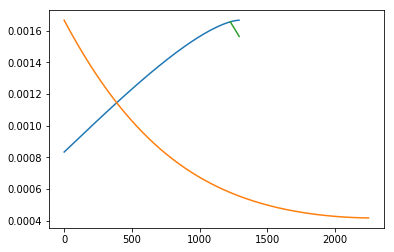

In [12]:
plt.show()

In [10]:
plt.close()

In [26]:
ca.phase1(1.0)

array([ 0.        ,  0.00047475,  0.00071389,  0.00090747,  0.00107635,
        0.00122896,  0.00136975,  0.00150141,  0.00162573,  0.00174396,
        0.00185704,  0.00196568,  0.00207044,  0.00217175,  0.00226999,
        0.00236546,  0.00245842,  0.00254908,  0.00263763,  0.00272423,
        0.00280903,  0.00289215,  0.0029737 ,  0.00305378,  0.00313247,
        0.00320987,  0.00328604,  0.00336104,  0.00343494,  0.0035078 ,
        0.00357965,  0.00365055,  0.00372055,  0.00378967,  0.00385796,
        0.00392545,  0.00399218,  0.00405817,  0.00412344,  0.00418804,
        0.00425197,  0.00431527,  0.00437795,  0.00444004,  0.00450156,
        0.00456252,  0.00462294,  0.00468283,  0.00474222,  0.00480111,
        0.00485953,  0.00491748,  0.00497498,  0.00503204,  0.00508866,
        0.00514487,  0.00520068,  0.00525608,  0.0053111 ,  0.00536574,
        0.00542001,  0.00547392,  0.00552748,  0.00558069,  0.00563357,
        0.00568612,  0.00573834,  0.00579025,  0.00584185,  0.00